# Pymaceuticals Inc.

### Analysis

* The Capomulin regimen's mouse weight and average tumor volume have a strong positive correlation.
* The Capolumin treatment shows to be effective, as the tumor volume dropped from 48(mm3) to 40(mm3) within 15 days for one subject.
* There is almost an equal distribution between male and female mice being treated.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_resultsdf = pd.merge(study_results,mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
data_resultsdf.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice.

mouse_count = len(data_resultsdf["Mouse ID"].unique())
mouse_count

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_id = data_resultsdf.loc[data_resultsdf.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id

array(['g989'], dtype=object)

In [8]:
# Get all the data for the duplicate mouse ID. 

g989_data = data_resultsdf.loc[data_resultsdf["Mouse ID"] == 'g989']
g989_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

data_clean = data_resultsdf.drop(data_resultsdf.index[data_resultsdf['Mouse ID'] == 'g989'])
data_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [10]:
# Checking the number of mice in the clean DataFrame.

mouse_count_clean = len(data_clean["Mouse ID"].unique())
mouse_count_clean

248

# Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# tv stands for tumor volume

tv_mean = data_clean.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tv_median = data_clean.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tv_var = data_clean.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tv_std = data_clean.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tv_sem = data_clean.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary DataFrame.

tv_data = pd.DataFrame({"Mean Tumor Volume": tv_mean,
                          "Median Tumor Volume": tv_median,
                          "Tumor Volume Variance": tv_var,
                          "Tumor Volume Std. Dev.": tv_std,
                          "Tumor Volume Std. Err.": tv_sem})
tv_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

tv_data_aggregated = data_clean.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
tv_data_aggregated

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Timepoints')

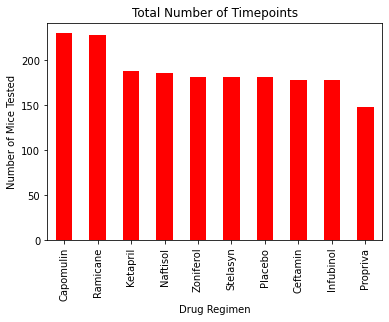

In [35]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar1 = data_clean['Drug Regimen'].value_counts().plot.bar(color='red')      #create graph with columns from cleaned data
bar1.set_xlabel("Drug Regimen")                                             #label axis
bar1.set_ylabel("Number of Mice Tested")                                    #label axis
bar1.set_title("Total Number of Timepoints")

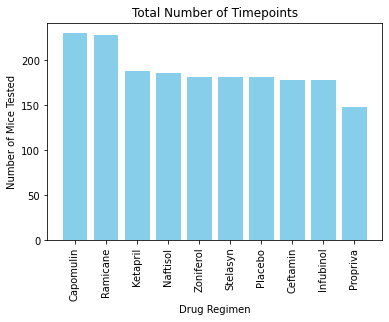

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

bar2 = data_clean['Drug Regimen'].value_counts()     
x = bar2.index.values                                #set variable
y = bar2.values                                      #set variable
plt.bar(x, y, color ='skyblue')                      #create bar graph with variables and add color
plt.xlabel("Drug Regimen")                           #label axis
plt.ylabel("Number of Mice Tested")                  #label axis
plt.xticks(rotation=90)                              #rotate x-axis labels
plt.title("Total Number of Timepoints")              #add title
plt.show()                                           #display graph

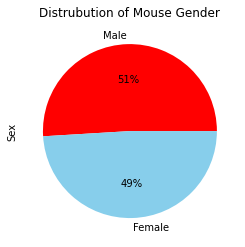

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie1 = data_clean['Sex'].value_counts().plot(kind ='pie', y ='sex', autopct ='%1.0f%%', colors = ['red', 'skyblue'], title = "Distrubution of Mouse Gender")

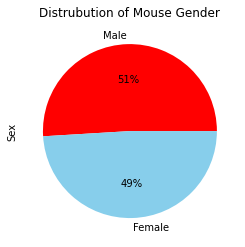

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = data_clean['Sex'].value_counts()
plt.pie(pie2, labels = ['Male', 'Female'], autopct='%1.0f%%', colors = ['red', 'skyblue'])
plt.ylabel('Sex')
plt.title("Distrubution of Mouse Gender")
plt.show()

# Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(data_clean.groupby(['Mouse ID']).max()['Timepoint'])

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tv_timepoint_merge = last_timepoint.merge(data_resultsdf, on=("Mouse ID", "Timepoint"), how = "inner")
tv_timepoint_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tv_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    row = tv_timepoint_merge.loc[(tv_timepoint_merge['Drug Regimen']==drug)]
    tv_for_drug = (row['Tumor Volume (mm3)'])
    
    # add subset 
    tv_list.append(tv_for_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = tv_for_drug.quantile([.25,.5,.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    
    print(f"{drug}'s potential outliers: Lower Bound ({lower_bound}), Upper Bound ({upper_bound})")

Capomulin's potential outliers: Lower Bound (20.70456164999999), Upper Bound (51.83201549)
Ramicane's potential outliers: Lower Bound (17.912664470000003), Upper Bound (54.30681135)
Infubinol's potential outliers: Lower Bound (36.83290494999999), Upper Bound (82.74144559000001)
Ceftamin's potential outliers: Lower Bound (25.355449580000002), Upper Bound (87.66645829999999)


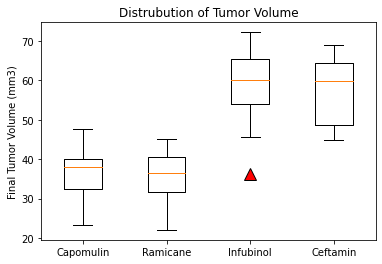

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tv_list, labels = drug_list,
           flierprops={'marker': '^', 'markersize': 12, 'markerfacecolor': 'red'})
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distrubution of Tumor Volume")
plt.show()

# Line and Scatter Plots

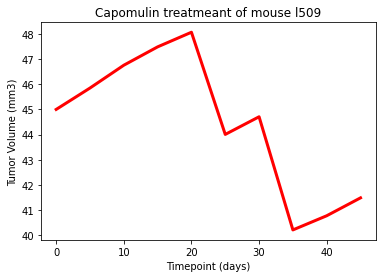

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse = data_clean.loc[data_clean["Mouse ID"] == "l509",:]
capomulin_time = capomulin_mouse["Timepoint"]
capomulin_tv = capomulin_mouse["Tumor Volume (mm3)"]

plt.plot(capomulin_time, capomulin_tv, linewidth = 3, color = 'red')
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

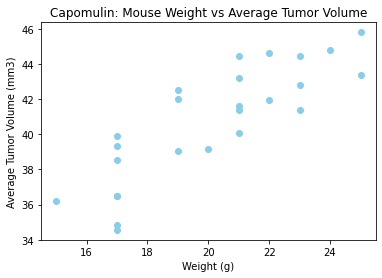

In [29]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = data_clean.loc[data_clean["Drug Regimen"] == "Capomulin",:]
data_averages = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(data_averages['Weight (g)'], data_averages['Tumor Volume (mm3)'], color = 'skyblue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Capomulin: Mouse Weight vs Average Tumor Volume")
plt.show()

# Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


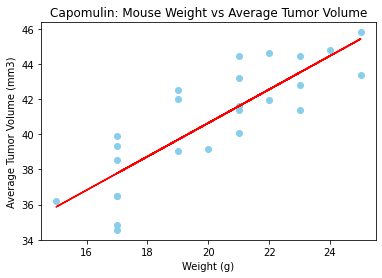

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(data_averages['Weight (g)'], data_averages['Tumor Volume (mm3)'])
regress_values = (data_averages['Weight (g)'] * slope + intercept)

correlation = round(st.pearsonr(data_averages['Weight (g)'], data_averages['Tumor Volume (mm3)'])[0],2)
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

plt.plot(data_averages['Weight (g)'], regress_values, color = 'red')
plt.scatter(data_averages['Weight (g)'], data_averages['Tumor Volume (mm3)'], color = 'skyblue')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Mouse Weight vs Average Tumor Volume")
plt.show()